# RF Regressor using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm Random Forest as a Regressor algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis 

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Initialize Test Set (Home | BLE)

In [5]:
test_dataset_ble  = load_file('../radiomap_home_BluetoothWiFi.csv')
test_dataset_ble  = replace_features_nan(test_dataset_ble,3)
display(test_dataset_ble)
display(test_dataset_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.0,-68.0,-69.0,-72.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.0,-66.0,-66.0,-70.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,-87.0,-76.0
2,526,-2.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527,-2.0,0.5,-65.0,-66.0,-66.0,-70.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.0,-66.0,-66.0,-71.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.0,-68.0,-68.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-76.0,NaN,-87.0,-76.0,NaN
126,650,-2.0,-1.5,-66.0,-67.0,-64.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-88.0,-80.0,NaN
127,651,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-96.0,-76.0,NaN
128,652,-2.0,-1.5,-65.0,-68.0,-66.0,NaN,-72.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-86.0,-76.0,NaN


(130, 18)

In [6]:
test_dataset_home_ble = load_file('../radiomap_home_Bluetooth.csv')
test_dataset_home_ble = replace_features_nan(test_dataset_home_ble,3)
display(test_dataset_home_ble)
display(test_dataset_home_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,NaN
1,391,-2.0,0.5,-84,-80,NaN
2,392,-2.0,0.5,-84,-85,NaN
3,393,-2.0,0.5,-84,-84,NaN
4,394,-2.0,0.5,-90,-81,NaN
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,NaN
126,517,-2.0,-1.5,-81,-90,NaN
127,518,-2.0,-1.5,-80,-88,NaN
128,519,-2.0,-1.5,-81,-87,NaN


(130, 6)

### Dataset Overall Info

In [7]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [8]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [9]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [10]:
missing_dataset = compute_missing_values(dataset)

,Missing Values,Samples,% of Missing Values
Fingerprint ID,0,750,0.000000
coordinate_X,0,750,0.000000
coordinate_Y,0,750,0.000000
zone,0,750,0.000000
f0:5c:19:94:1a:40,120,750,0.160000
f0:5c:19:94:1a:41,116,750,0.154667
f0:5c:19:94:1a:42,115,750,0.153333
34:fc:b9:18:e4:c1,561,750,0.748000
34:fc:b9:18:e4:c0,605,750,0.806667
34:fc:b9:18:e4:c2,572,750,0.762667


### Overall Histogram of dataset atributes

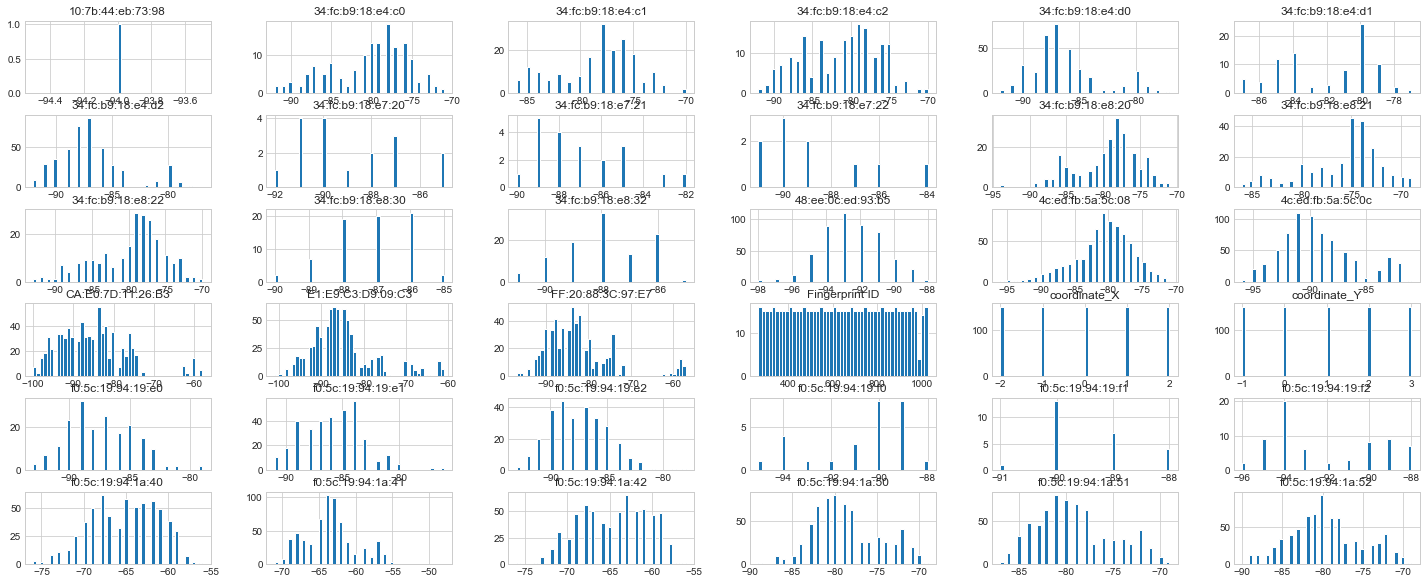

In [11]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Reference Points
Graphical display of the reference points scanned in the experiment

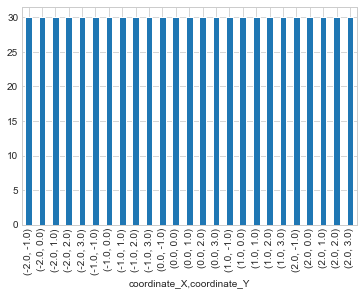

In [12]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,-80.0,-80.0,-80.0,-89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,-80.0,-81.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-63.0,-62.0,-62.0,NaN,NaN,NaN,-80.0,-79.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.0,-61.0,-63.0,NaN,NaN,NaN,-81.0,-81.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,-80.0,-80.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0
746,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-74.0,-73.0,-83.0,...,-86.0,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0
747,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0
748,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,-72.0,-73.0,-83.0,...,-85.0,NaN,NaN,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN


<BarContainer object of 30 artists>

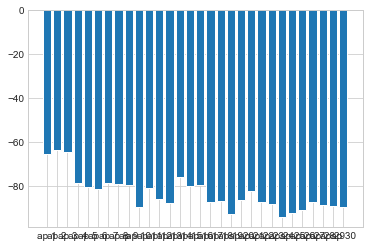

In [13]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


<BarContainer object of 3 artists>

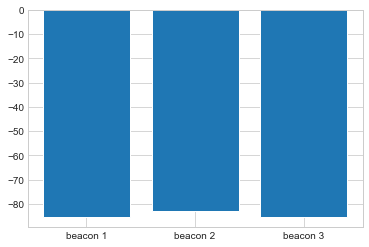

In [14]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

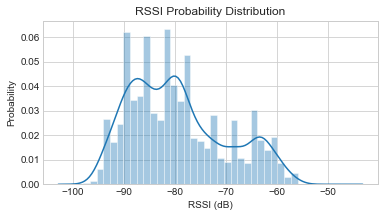

In [15]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

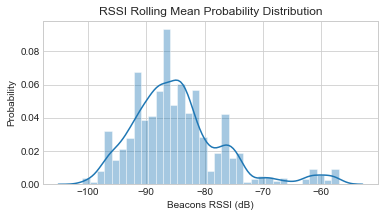

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [17]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [18]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [19]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [20]:
def compute_data_cleaning_with_global_minimum(dataset,position,index):
    numpy_arr_wifi=dataset.iloc[:,position:index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    dataset.iloc[:,position:index] = dataset.iloc[:,position:index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [21]:
def compute_data_cleaning_with_global_minimum_only_ble(dataset,position,index):
    numpy_arr_ble=dataset.iloc[:,index:].to_numpy()
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,index:] = dataset.iloc[:,index:].fillna(nan_filler_ble)
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [22]:
compute_data_cleaning_with_global_minimum(dataset,4,first_beacon_index)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


In [23]:
first_beacon_index_test_dataset  = -1
for ap in test_dataset_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset = list(test_dataset_ble).index(ap)
        break
display(test_dataset_ble.iloc[:,first_beacon_index_test_dataset:])

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,NaN,NaN,NaN
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,NaN
...,...,...,...
125,-87.0,-76.0,NaN
126,-88.0,-80.0,NaN
127,-96.0,-76.0,NaN
128,-86.0,-76.0,NaN


In [24]:
compute_data_cleaning_with_global_minimum(test_dataset_ble,3,first_beacon_index_test_dataset)
display(test_dataset_ble)

MINIMUM WIFI: -81.81
MINIMUM BLE: -101.0


,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69.00,-68.00,-69.00,-72.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70.00,-66.00,-66.00,-70.00,-73.00,-72.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-88.0,-87.0,-76.0
2,526,-2.0,0.5,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-101.0,-101.0,-101.0
3,527,-2.0,0.5,-65.00,-66.00,-66.00,-70.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66.00,-66.00,-66.00,-71.00,-81.81,-68.00,-81.81,-81.81,-81.81,-81.81,-81.81,-81.81,-92.0,-91.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65.00,-68.00,-68.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-76.00,-81.81,-87.0,-76.0,-101.0
126,650,-2.0,-1.5,-66.00,-67.00,-64.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-88.0,-80.0,-101.0
127,651,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-71.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-96.0,-76.0,-101.0
128,652,-2.0,-1.5,-65.00,-68.00,-66.00,-81.81,-72.00,-71.00,-75.00,-75.00,-81.81,-81.81,-77.00,-79.00,-86.0,-76.0,-101.0


In [25]:
first_beacon_index_test_dataset_v2  = -1
for ap in test_dataset_home_ble.iloc[:,3:]:
    if ap.isupper() == True:
        first_beacon_index_test_dataset_v2 = list(test_dataset_home_ble).index(ap)
        break
display(test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:])

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,NaN
1,-84,-80,NaN
2,-84,-85,NaN
3,-84,-84,NaN
4,-90,-81,NaN
...,...,...,...
125,-80,-88,NaN
126,-81,-90,NaN
127,-80,-88,NaN
128,-81,-87,NaN


In [26]:
compute_data_cleaning_with_global_minimum_only_ble(test_dataset_home_ble,3,first_beacon_index_test_dataset_v2)
display(test_dataset_home_ble)

MINIMUM BLE: -95.95


,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,-95.95
1,391,-2.0,0.5,-84,-80,-95.95
2,392,-2.0,0.5,-84,-85,-95.95
3,393,-2.0,0.5,-84,-84,-95.95
4,394,-2.0,0.5,-90,-81,-95.95
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,-95.95
126,517,-2.0,-1.5,-81,-90,-95.95
127,518,-2.0,-1.5,-80,-88,-95.95
128,519,-2.0,-1.5,-81,-87,-95.95


### Initialize Training Data
Training Data intialization for predictions purposes

In [27]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-86.00,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-85.00,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98


(750, 30)

In [28]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [29]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


(750, 33)

In [30]:
train_Y = dataset.iloc[:,1:3]
display(train_Y)
display(train_Y.shape)

,coordinate_X,coordinate_Y
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
745,2.0,3.0
746,2.0,3.0
747,2.0,3.0
748,2.0,3.0


(750, 2)

### Initialize Test Data

In [31]:
test_ble_X = test_dataset_ble.iloc[:,first_beacon_index_test_dataset:]
display(test_ble_X)
display(test_ble_X.shape)
test_ble_Y = test_dataset_ble.iloc[:,1:3]
display(test_ble_Y)
display(test_ble_Y.shape)

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.0,-83.0
1,-88.0,-87.0,-76.0
2,-101.0,-101.0,-101.0
3,-86.0,-87.0,-81.0
4,-92.0,-91.0,-101.0
...,...,...,...
125,-87.0,-76.0,-101.0
126,-88.0,-80.0,-101.0
127,-96.0,-76.0,-101.0
128,-86.0,-76.0,-101.0


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

In [32]:
test_ble_home_X = test_dataset_home_ble.iloc[:,first_beacon_index_test_dataset_v2:]
display(test_ble_home_X)
display(test_ble_home_X.shape)
test_ble_home_Y = test_dataset_home_ble.iloc[:,1:3]
display(test_ble_home_Y)
display(test_ble_home_Y.shape)

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,-95.95
1,-84,-80,-95.95
2,-84,-85,-95.95
3,-84,-84,-95.95
4,-90,-81,-95.95
...,...,...,...
125,-80,-88,-95.95
126,-81,-90,-95.95
127,-80,-88,-95.95
128,-81,-87,-95.95


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [33]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [34]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [35]:
default_groups = dataset["coordinate_X"].map(str)+","+dataset["coordinate_Y"].map(str)
rf_basic = RandomForestRegressor()
print("DEFAULT HYPERPARAMETERS")
default_params = rf_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 
#Preprocessing options
scaler = [StandardScaler(),MaxAbsScaler(),MinMaxScaler(),None]
# Number of trees in random forest
initial_linespace = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
n_estimators = [10,100] + initial_linespace
# Criterion to consider at every split
criterion_metric = ['mse','mae']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__criterion': criterion_metric,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}
print(random_grid)

DEFAULT HYPERPARAMETERS


,bootstrap,ccp_alpha,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
1,True,0.0,mse,None,auto,None,None,0.0,None,1,2,0.0,100,None,False,None,0,False


{'rf__n_estimators': [10, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__criterion': ['mse', 'mae'], 'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4], 'rf__bootstrap': [True, False]}


### Statistics Output Format
Structure of the statistical output of each call to the RF Regression Function

In [36]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection 
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([2.68354453e-02, 1.90880958e-02, 2.69009578e-02, 5.17157248e-04,
       4.11920013e-04, 6.79607484e-04, 4.91811024e-02, 2.82154405e-02,
       2.84175372e-02, 5.39911260e-02, 2.37145004e-02, 9.76495762e-03,
       7.05297696e-03, 7.84367530e-04, 8.86792002e-04, 1.05273626e-03,
       9.74483194e-04, 1.29130264e-02, 2.03995263e-02, 1.85494082e-02,
       2.54607594e-03, 2.07782161e-03, 5.43267129e-03, 0.00000000e+00,
       6.62862192e-03, 3.12248813e-06, 1.50942961e-05, 0.00000000e+00,
       9.43265171e-06, 1.07193566e-04, 1.87934584e-01, 1.47819018e-01,
       3.17095200e-01])

CA:E0:7D:11:26:B3    0.317095
E1:E9:C3:D9:09:C3    0.187935
FF:20:88:3C:97:E7    0.147819
4c:ed:fb:5a:5c:0c    0.053991
f0:5c:19:94:1a:50    0.049181
f0:5c:19:94:1a:52    0.028418
f0:5c:19:94:1a:51    0.028215
f0:5c:19:94:1a:42    0.026901
f0:5c:19:94:1a:40    0.026835
4c:ed:fb:5a:5c:08    0.023715
48:ee:0c:ed:93:b5    0.020400
f0:5c:19:94:1a:41    0.019088
34:fc:b9:18:e4:d0    0.018549
34:fc:b9:18:e4:d2    0.012913
f0:5c:19:94:19:e1    0.009765
f0:5c:19:94:19:e2    0.007053
f0:5c:19:94:19:f2    0.006629
34:fc:b9:18:e8:32    0.005433
34:fc:b9:18:e4:d1    0.002546
34:fc:b9:18:e8:30    0.002078
34:fc:b9:18:e8:20    0.001053
f0:5c:19:94:19:e0    0.000974
34:fc:b9:18:e8:22    0.000887
34:fc:b9:18:e8:21    0.000784
34:fc:b9:18:e4:c2    0.000680
34:fc:b9:18:e4:c1    0.000517
34:fc:b9:18:e4:c0    0.000412
f0:5c:19:94:19:f1    0.000107
34:fc:b9:18:e7:21    0.000015
34:fc:b9:18:e7:20    0.000009
f0:5c:19:94:19:f0    0.000003
34:fc:b9:18:e7:22    0.000000
10:7b:44:eb:73:98    0.000000
dtype: flo

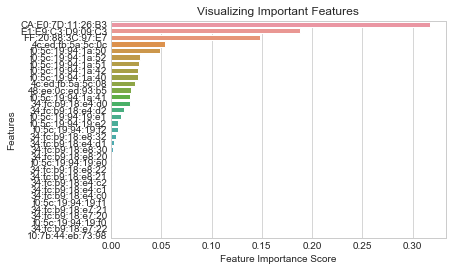

In [37]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y)
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - RF Regression Model

In [38]:
def compute_RF_Regression(flag=0,
                              trainX_data = None, trainY_data = None,
                              testX_data = None,testY_data = None, 
                              scaler = None,cross_validation = None,
                              n_estimators_parameter = 100, criterion_parameter = 'mse',
                              max_depth_parameter = None,min_samples_split_parameter = 2,
                              min_samples_leaf_parameter = 1,max_features_parameter = 'auto',
                              bootstrap_parameter = True, random_state_parameter = 42):
    # Init the RF Regressor Estimator with the hyperparameters
    random_forest_estimator = RandomForestRegressor(n_estimators=n_estimators_parameter,criterion=criterion_parameter,
                                                    max_features=max_features_parameter,max_depth=max_depth_parameter,
                                                    min_samples_leaf=min_samples_leaf_parameter,min_samples_split=min_samples_split_parameter,
                                                    bootstrap=bootstrap_parameter,random_state=random_state_parameter)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,random_forest_estimator)
    else:
        # Use SKLearn RF Regression Default Estimator
        main_estimator = random_forest_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        # Compute Regression performance metrics
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

### Experiments

#### Check Training model with no cross validation
Use RF Regressor to check the results on the training data alone

In [39]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_RF_Regression(trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.085991,0.029146,0.170723,0.147584,0.000000,0.022361,0.080000,0.372967,0.0,1.396352,0.992713,Both
0,0.143392,0.060011,0.244972,0.198753,0.010000,0.060414,0.151026,0.568822,0.0,1.372771,0.984997,WiFi
1,0.314413,0.227282,0.476741,0.358606,0.036056,0.212245,0.376264,1.083057,0.0,2.164214,0.943179,BLE


#### Experiment - RF with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [40]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        skf = StratifiedKFold(n_splits=cv)
        splited = skf.split(trainX_data,default_groups)
        result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
26,0.265471,0.243510,0.493467,0.416253,0.014142,0.082462,0.247103,1.153808,0.0,3.311027,0.939122,10,Both
25,0.276476,0.253438,0.503426,0.420993,0.014142,0.102956,0.273002,1.234422,0.0,3.086487,0.936640,9,Both
24,0.278060,0.259407,0.509320,0.427004,0.014142,0.090277,0.303793,1.258576,0.0,3.203155,0.935148,8,Both
23,0.285924,0.287552,0.536239,0.453954,0.014142,0.100000,0.282577,1.234874,0.0,3.315177,0.928112,7,Both
21,0.295326,0.274889,0.524298,0.433500,0.020000,0.112470,0.292672,1.269610,0.0,3.294920,0.931278,5,Both
22,0.304794,0.312727,0.559220,0.469171,0.020000,0.103680,0.305990,1.266362,0.0,3.680245,0.921818,6,Both
20,0.329761,0.332916,0.576988,0.473786,0.028284,0.123683,0.324789,1.294387,0.0,2.985431,0.916771,4,Both
19,0.344030,0.361345,0.601120,0.493268,0.031623,0.149330,0.357771,1.427806,0.0,3.431108,0.909664,3,Both
18,0.391241,0.377212,0.614176,0.473753,0.070000,0.208806,0.468913,1.437381,0.0,3.065290,0.905697,2,Both
7,0.401128,0.448280,0.669537,0.536433,0.040000,0.192354,0.453100,1.483575,0.0,3.888817,0.887930,9,WiFi


Number of Folds:  10


#### Experiment - RF with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [41]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
18,0.260302,0.239928,0.489824,0.417729,0.012071,0.092195,0.243678,1.071380,0.000000,2.492429,0.940018,0.1,Both
19,0.264481,0.216267,0.465045,0.383795,0.022361,0.113137,0.270672,1.216001,0.000000,2.213707,0.945933,0.2,Both
20,0.272555,0.222876,0.472098,0.386333,0.022361,0.114018,0.269101,1.230218,0.000000,1.932149,0.944281,0.3,Both
21,0.290618,0.251627,0.501624,0.409545,0.041231,0.120000,0.294822,1.355038,0.000000,2.260354,0.937093,0.4,Both
22,0.324901,0.255490,0.505460,0.387724,0.050000,0.171172,0.370998,1.120284,0.000000,1.949897,0.936128,0.5,Both
23,0.404692,0.394191,0.627846,0.480550,0.090138,0.233773,0.420476,1.489282,0.000000,2.627737,0.901452,0.6,Both
1,0.414627,0.444815,0.666945,0.524148,0.043423,0.175780,0.469137,1.474196,0.000000,2.441250,0.888796,0.2,WiFi
2,0.421077,0.467729,0.683907,0.540111,0.044721,0.176918,0.520343,1.648692,0.000000,2.485739,0.883068,0.3,WiFi
24,0.461753,0.497612,0.705416,0.533797,0.111803,0.276586,0.486886,1.754757,0.000000,3.157531,0.875597,0.7,Both
3,0.467363,0.574398,0.757890,0.597629,0.062434,0.209144,0.475960,1.685354,0.000000,3.519730,0.856400,0.4,WiFi


#### Experiment - RF with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [42]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups)
    result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,BLE
2,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,Both
0,2.245947,5.857688,2.420266,0.902495,1.748305,2.183622,2.914414,3.533802,0.190000,3.903639,-0.464422,WiFi


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using RF

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
8,0.265471,0.243510,0.493467,0.416253,0.014142,0.082462,0.247103,1.153808,0.000000,3.311027,0.939122,Stratified K-Fold,Both
7,0.272555,0.222876,0.472098,0.386333,0.022361,0.114018,0.269101,1.230218,0.000000,1.932149,0.944281,HoldOut,Both
2,0.414291,0.478397,0.691662,0.554229,0.043000,0.196723,0.451309,1.504734,0.000000,4.056908,0.880401,Stratified K-Fold,WiFi
1,0.421077,0.467729,0.683907,0.540111,0.044721,0.176918,0.520343,1.648692,0.000000,2.485739,0.883068,HoldOut,WiFi
4,0.761544,1.214861,1.102207,0.798590,0.118004,0.532846,0.970227,2.426609,0.000000,3.601611,0.696285,HoldOut,BLE
5,0.764820,1.167427,1.080475,0.763711,0.098615,0.581450,0.992341,2.314973,0.000000,3.759222,0.708143,Stratified K-Fold,BLE
3,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,LOO,BLE
6,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,LOO,Both
0,2.245947,5.857688,2.420266,0.902495,1.748305,2.183622,2.914414,3.533802,0.190000,3.903639,-0.464422,LOO,WiFi


Selected cross validation method:  LOO


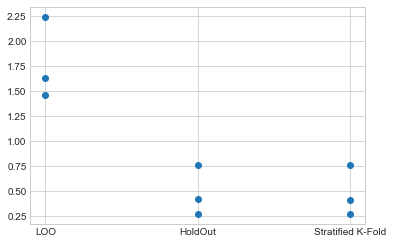

In [43]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    holdout = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups)
    loo = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'],'o')
selected_method = 'LOO'
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [44]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc,type
4,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
7,1.458255,2.536715,1.592707,0.640901,1.011274,1.343374,1.632607,2.753515,0.079344,3.483971,0.365821,None,None,BLE
6,1.459546,2.538633,1.593309,0.639456,1.015997,1.343485,1.642315,2.748217,0.079344,3.483971,0.365342,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
5,1.460634,2.548251,1.596324,0.644480,1.012126,1.341062,1.652180,2.761355,0.079344,3.483971,0.362937,MaxAbsScaler,MaxAbsScaler(copy=True),BLE
8,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
11,1.633208,3.168714,1.780088,0.708530,1.089277,1.517445,1.985411,2.800071,0.150000,3.933955,0.207821,None,None,Both
9,1.636535,3.178828,1.782927,0.707990,1.086405,1.519967,1.992679,2.800121,0.150000,3.933955,0.205293,MaxAbsScaler,MaxAbsScaler(copy=True),Both
10,1.637950,3.186942,1.785201,0.710447,1.082266,1.508227,1.994644,2.813918,0.150000,3.933955,0.203264,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
2,2.242346,5.837260,2.416042,0.900126,1.767970,2.173188,2.914654,3.531595,0.210950,3.903639,-0.459315,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
3,2.243057,5.844154,2.417468,0.902183,1.761256,2.162914,2.917288,3.542193,0.190000,3.903639,-0.461038,None,None,WiFi


Selected Preprocessing:  StandardScaler


#### Experiment - Running the RF function with the different number of decision trees

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,n_estimator,type
14,1.450165,2.513141,1.585289,0.640866,1.007799,1.331170,1.620297,2.782628,0.054473,3.596594,0.371715,200,BLE
15,1.453599,2.519900,1.587419,0.638352,1.005245,1.335687,1.640202,2.765024,0.110632,3.590798,0.370025,400,BLE
23,1.456526,2.525348,1.589134,0.635941,1.010500,1.342672,1.633171,2.751118,0.148597,3.598868,0.368663,2000,BLE
16,1.456668,2.525179,1.589081,0.635481,1.005668,1.339758,1.646060,2.754951,0.169192,3.585030,0.368705,600,BLE
21,1.456866,2.527299,1.589748,0.636694,1.007787,1.343629,1.636738,2.751473,0.145513,3.596426,0.368175,1600,BLE
19,1.456964,2.527527,1.589820,0.636650,1.006976,1.344348,1.639373,2.751577,0.155644,3.590540,0.368118,1200,BLE
17,1.457000,2.526465,1.589486,0.635732,1.012554,1.343132,1.640900,2.749520,0.167243,3.590009,0.368384,800,BLE
20,1.457005,2.527485,1.589807,0.636523,1.005325,1.343625,1.638323,2.749363,0.141205,3.593740,0.368129,1400,BLE
22,1.457117,2.527254,1.589734,0.636084,1.005282,1.341812,1.634767,2.752359,0.150033,3.595116,0.368187,1800,BLE
13,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,100,BLE


Selected Estimator Size:  200


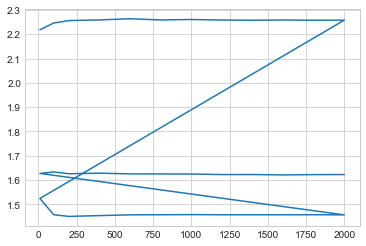

In [45]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','n_estimator','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for n in n_estimators:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               n_estimators_parameter=n)
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               n_estimators_parameter=n)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),n_estimators_parameter=n)
        result.append(n)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['n_estimator'],statistics['mae'])
selected_estimator_size = statistics.sort_values(by=['mae'])['n_estimator'].head(1).values[0]
print("Selected Estimator Size: ",selected_estimator_size)

#### Experiment - Running the RF function with the different criterias

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,criterion,type
3,1.445904,2.462604,1.569269,0.610298,1.036472,1.314589,1.657148,2.659416,0.030000,3.582862,0.384349,mae,BLE
2,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,mse,BLE
4,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,mse,Both
5,1.653505,3.269031,1.808046,0.731893,1.047520,1.585086,2.065687,3.019933,0.094340,3.773857,0.182742,mae,Both
1,2.240470,5.736503,2.395100,0.847203,1.777784,2.194844,2.914824,3.409127,0.170294,3.908990,-0.434126,mae,WiFi
0,2.245947,5.857688,2.420266,0.902495,1.748305,2.183622,2.914414,3.533802,0.190000,3.903639,-0.464422,mse,WiFi


Selected Criterion:  mae


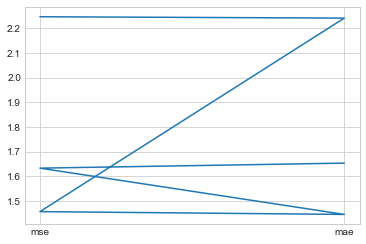

In [46]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','criterion','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for metric in criterion_metric:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               criterion_parameter=metric) 
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               criterion_parameter=metric)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),criterion_parameter=metric)
        result.append(metric)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['criterion'],statistics['mae'])
selected_criterion = statistics.sort_values(by=['mae'])['criterion'].head(1).values[0]
print("Selected Criterion: ",selected_criterion)

#### Experiment - Running the RF function with the different max_features

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,max_feature,type
4,1.408189,2.398714,1.548778,0.645193,0.998248,1.273851,1.564567,2.690394,0.032998,3.714536,0.400321,sqrt,BLE
5,1.408189,2.398714,1.548778,0.645193,0.998248,1.273851,1.564567,2.690394,0.032998,3.714536,0.400321,log2,BLE
3,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,auto,BLE
6,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,auto,Both
7,1.747701,3.579597,1.891982,0.725148,1.294100,1.795131,2.137945,2.871281,0.064031,3.466598,0.105101,sqrt,Both
8,1.747701,3.579597,1.891982,0.725148,1.294100,1.795131,2.137945,2.871281,0.064031,3.466598,0.105101,log2,Both
2,2.235319,5.753520,2.398650,0.870563,1.749278,2.246163,2.811473,3.507311,0.044721,4.066694,-0.438380,log2,WiFi
0,2.245947,5.857688,2.420266,0.902495,1.748305,2.183622,2.914414,3.533802,0.190000,3.903639,-0.464422,auto,WiFi
1,2.255655,5.758652,2.399719,0.819493,1.731950,2.280844,2.765085,3.501114,0.090554,4.083136,-0.439663,sqrt,WiFi


Selected max_feature:  sqrt


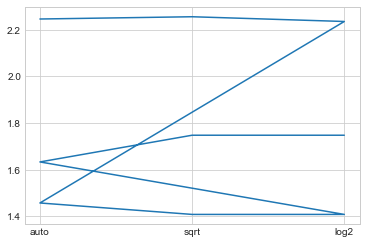

In [47]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','max_feature','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for max_feature in max_features:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               max_features_parameter=max_feature) 
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               max_features_parameter=max_feature) 
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),max_features_parameter=max_feature) 
        result.append(max_feature)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['max_feature'],statistics['mae'])
selected_max_feature = statistics.sort_values(by=['mae'])['max_feature'].head(1).values[0]
print("Selected max_feature: ",selected_max_feature)

#### Experiment - Running the RF function with the different max_depth metric

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,max_depth,type
12,1.437204,2.447539,1.564461,0.618461,1.014134,1.309896,1.630490,2.625531,0.050309,3.467339,0.388115,10.0,BLE
13,1.457200,2.533218,1.591609,0.640573,1.010003,1.345046,1.635723,2.761355,0.043575,3.628483,0.366695,20.0,BLE
17,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,60.0,BLE
18,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,70.0,BLE
21,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,100.0,BLE
16,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,50.0,BLE
15,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,40.0,BLE
14,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,30.0,BLE
22,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,110.0,BLE
19,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,80.0,BLE


Selected max_depth:  10.0


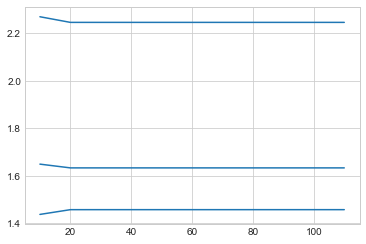

In [48]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','max_depth','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for depth in max_depth:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               max_depth_parameter=depth) 
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               max_depth_parameter=depth) 
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),max_depth_parameter=depth) 
        result.append(depth)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['max_depth'],statistics['mae'])
selected_max_depth = statistics.sort_values(by=['mae'])['max_depth'].head(1).values[0]
print("Selected max_depth: ",selected_max_depth)

#### Experiment: Running the RF function with the different min_samples_split metric

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,min_samples_split,type
5,1.404332,2.317881,1.522459,0.588382,0.990583,1.287345,1.623365,2.570405,0.097156,3.339541,0.420530,10,BLE
4,1.423949,2.400630,1.549397,0.611144,0.999607,1.312196,1.623560,2.655955,0.146027,3.456982,0.399842,5,BLE
3,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,2,BLE
8,1.632073,3.146791,1.773920,0.695537,1.081932,1.487973,2.006732,2.735426,0.169078,3.978757,0.213302,10,Both
6,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,2,Both
7,1.635945,3.174107,1.781603,0.706015,1.091201,1.493063,1.994237,2.783237,0.140744,3.981262,0.206473,5,Both
0,2.245947,5.857688,2.420266,0.902495,1.748305,2.183622,2.914414,3.533802,0.190000,3.903639,-0.464422,2,WiFi
2,2.257128,5.881981,2.425280,0.887923,1.758281,2.174960,2.913779,3.563290,0.235074,3.898660,-0.470495,10,WiFi
1,2.263228,5.929576,2.435072,0.899140,1.792974,2.150675,2.919578,3.561763,0.236089,3.891890,-0.482394,5,WiFi


Selected min_samples_split:  10


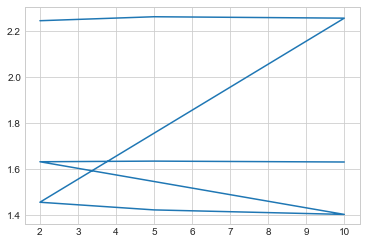

In [49]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','min_samples_split','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for s in min_samples_split:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               min_samples_split_parameter=s)
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               min_samples_split_parameter=s) 
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),min_samples_split_parameter=s) 
        result.append(s)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['min_samples_split'],statistics['mae'])
selected_min_samples_split = statistics.sort_values(by=['mae'])['min_samples_split'].head(1).values[0]
print("Selected min_samples_split: ",selected_min_samples_split)

#### Experiment: Running the RF function with the different min_samples_leaf metric

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,min_samples_leaf,type
5,1.405317,2.315936,1.521820,0.584358,0.990641,1.286784,1.655911,2.528939,0.131031,3.342926,0.421016,4,BLE
4,1.424069,2.397796,1.548482,0.608537,0.995353,1.308360,1.668725,2.625434,0.208184,3.452400,0.400551,2,BLE
3,1.457238,2.533231,1.591613,0.640497,1.011228,1.343763,1.643134,2.761355,0.043575,3.628483,0.366692,1,BLE
8,1.629948,3.127273,1.768410,0.686419,1.065925,1.490668,2.036890,2.673831,0.156295,3.787993,0.218182,4,Both
7,1.630189,3.155403,1.776345,0.706081,1.087675,1.464916,1.998550,2.708615,0.100313,3.974800,0.211149,2,Both
6,1.633181,3.167281,1.779686,0.707580,1.076824,1.516146,1.993065,2.800071,0.150000,3.977587,0.208180,1,Both
0,2.245947,5.857688,2.420266,0.902495,1.748305,2.183622,2.914414,3.533802,0.190000,3.903639,-0.464422,1,WiFi
1,2.253359,5.905815,2.430188,0.910655,1.720341,2.162888,2.938570,3.594984,0.211991,3.994008,-0.476454,2,WiFi
2,2.275088,5.992544,2.447967,0.904216,1.739300,2.211198,2.942703,3.628846,0.308720,4.051551,-0.498136,4,WiFi


Selected min_samples_leaf:  4


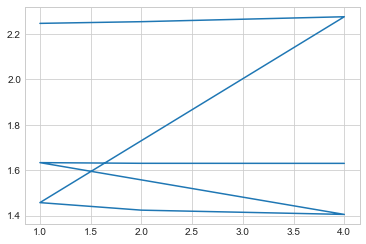

In [50]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','min_samples_leaf','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for leaf in min_samples_leaf:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               min_samples_leaf_parameter=leaf)
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_RF_Regression(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               min_samples_leaf_parameter=leaf) 
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_RF_Regression(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),min_samples_leaf_parameter=leaf)
        result.append(leaf)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['min_samples_leaf'],statistics['mae'])
selected_min_samples_leaf = statistics.sort_values(by=['mae'])['min_samples_leaf'].head(1).values[0]
print("Selected min_samples_leaf: ",selected_min_samples_leaf)

#### Run RandomizedSearchCV for parameter tunning¶

In [51]:
types = ['WiFi','BLE','Both']
results = list()
grid_results = list()
scores = ['r2']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train  
        pipe = Pipeline([('standardizer', StandardScaler()), ('rf', RandomForestRegressor())])
        clf = RandomizedSearchCV(pipe, param_distributions  = random_grid,n_iter=30,n_jobs=-1,cv=StratifiedKFold(n_splits=selected_fold, shuffle=True, random_state=42).split(trainX_data, default_groups),scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y)
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for r2

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 45.8min finished


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.8min finished


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.7min finished


,rf__n_estimators,rf__min_samples_split,rf__min_samples_leaf,rf__max_features,rf__max_depth,rf__criterion,rf__bootstrap,score,best_score,type
2,1200,5,1,log2,100,mse,False,r2,0.953529,Both
0,1200,2,1,log2,90,mae,False,r2,0.900364,WiFi
1,600,5,1,log2,80,mse,True,r2,0.763001,BLE


### Best Parameters
Display the best parameters tunned throughout the experiments

In [52]:
selected_max_depth = 110.0
conclusion_cols=['Cross_Validation','Number of Estimators','Max Features','Max Depth','Criterion','Min_Samples_Leaf','Min_Samples_Split','Preprocessing']
conclusion_list = [selected_method,selected_estimator_size,selected_max_feature,selected_max_depth,selected_criterion,
                   selected_min_samples_leaf,selected_min_samples_split,selected_preprocessing]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,Cross_Validation,Number of Estimators,Max Features,Max Depth,Criterion,Min_Samples_Leaf,Min_Samples_Split,Preprocessing
0,LOO,200,sqrt,110.0,mae,4,10,StandardScaler


### Best Results

In [53]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
final_results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y,groups=default_groups)
        result = compute_RF_Regression(flag=1,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                            n_estimators_parameter=selected_estimator_size,criterion_parameter=selected_criterion,
                                          max_depth_parameter=selected_max_depth, max_features_parameter=selected_max_feature,
                                          min_samples_leaf_parameter=selected_min_samples_leaf,
                                          min_samples_split_parameter=selected_min_samples_split)
    elif selected_method =='Stratified K-Fold':
        skf = StratifiedKFold(n_splits=selected_fold)
        splited = skf.split(trainX_data,default_groups)
        result = compute_RF_Regression(flag=1,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),
                                             cross_validation = splited,
                            n_estimators_parameter=selected_estimator_size,criterion_parameter=selected_criterion,
                                          max_depth_parameter=selected_max_depth, max_features_parameter=selected_max_feature,
                                          min_samples_leaf_parameter=selected_min_samples_leaf,
                                          min_samples_split_parameter=selected_min_samples_split) 
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_RF_Regression(flag=1,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),n_estimators_parameter=selected_estimator_size,criterion_parameter=selected_criterion,
                                          max_depth_parameter=selected_max_depth, max_features_parameter=selected_max_feature,
                                          min_samples_leaf_parameter=selected_min_samples_leaf,
                                          min_samples_split_parameter=selected_min_samples_split) 
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.394118,2.276273,1.508732,0.577195,1.018610,1.333950,1.625772,2.520780,0.086350,3.123109,0.430932,BLE
2,1.803615,3.778454,1.943825,0.725348,1.320042,1.845171,2.194664,2.885917,0.020156,3.466226,0.055386,Both
0,2.221958,5.635046,2.373825,0.835990,1.716064,2.333294,2.783016,3.405620,0.163783,3.768894,-0.408762,WiFi


### Best Result - Testing (Home | BLE)

In [54]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = RandomForestRegressor(n_estimators=selected_estimator_size,criterion=selected_criterion,
                                          max_depth=selected_max_depth, max_features=selected_max_feature,
                                          min_samples_leaf=selected_min_samples_leaf,
                                          min_samples_split=selected_min_samples_split)
    else: 
        model = RandomForestRegressor()
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,2.504587,7.653539,2.766503,1.179528,1.274618,2.563206,3.423769,4.198901,0.508035,4.765454,-4.173123,None,True
1,2.616834,7.595277,2.755953,0.867901,1.735569,2.563630,3.511723,3.756621,1.494055,3.756621,-3.860709,None,False


### Best Result - Testing (Home | BLE)

In [55]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_home_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = RandomForestRegressor(n_estimators=selected_estimator_size,criterion=selected_criterion,
                                          max_depth=selected_max_depth, max_features=selected_max_feature,
                                          min_samples_leaf=selected_min_samples_leaf,
                                          min_samples_split=selected_min_samples_split)
    else: 
        model = RandomForestRegressor()
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_home_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_home_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,1.992096,4.958765,2.226828,0.998996,1.170473,1.911413,2.320387,3.895523,0.470956,4.941584,-2.590210,None,True
1,2.555605,7.275669,2.697345,0.866213,1.638566,2.558300,3.443095,3.633855,1.443918,3.633855,-3.656256,None,False


### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,1.394118,2.276273,1.508732,0.577195,1.018610,1.333950,1.625772,2.520780,0.086350,3.123109,0.430932,BLE,None
2,1.992096,4.958765,2.226828,0.998996,1.170473,1.911413,2.320387,3.895523,0.470956,4.941584,-2.590210,None,True
1,2.504587,7.653539,2.766503,1.179528,1.274618,2.563206,3.423769,4.198901,0.508035,4.765454,-4.173123,None,True


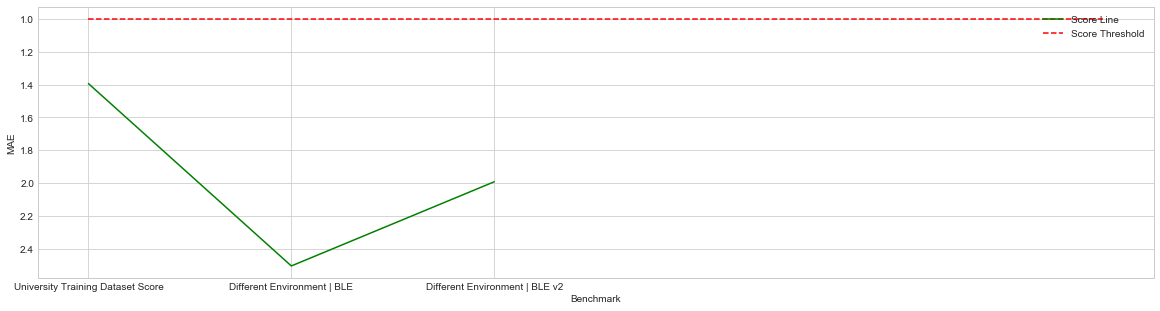

In [56]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
types = ['University Training Dataset Score','Different Environment | BLE','Different Environment | BLE v2']
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.hlines(1.0,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()